In [57]:
import tweepy
import pandas as pd
import os 
from dotenv import load_dotenv
import json
import csv
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import metrics


In [4]:
# Load the JSON file
with open('output.json') as f:
    data = json.load(f)

df_list = []

# Loop through each batch of data
for batch in data:
    # Check if 'data' key exists in the batch
    if 'data' in batch:
        # Extract the data from the batch
        for item in batch['data']:
            df_list.append(item)

# Convert the list to a dataframe
dfjson = pd.DataFrame(df_list)
pd.set_option('max_colwidth', None)

dfjson



,verified_type,created_at,description,name,protected,verified,id,profile_image_url,username,public_metrics,location,entities,url,pinned_tweet_id,withheld
0,none,2008-11-10T23:43:44.000Z,Progressive couldn't help me from becoming my parents. I leave voicemails.,Just Robie,False,False,17298202,https://pbs.twimg.com/profile_images/1510400486549118986/6V0AaXx9_normal.jpg,007MadMask,"{'followers_count': 276, 'following_count': 1763, 'tweet_count': 4846, 'listed_count': 1}",NaN,NaN,NaN,NaN,NaN
1,none,2022-02-15T00:24:25.000Z,,Vee,False,False,1493380581194932227,https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,Vee97594531,"{'followers_count': 15, 'following_count': 114, 'tweet_count': 11949, 'listed_count': 0}",NaN,NaN,NaN,NaN,NaN
2,none,2022-04-07T00:09:57.000Z,"Retired, white, divorced but ATTACHED, life-long, Christian, conservative, mother/grandma & Trumplican since 2016! ULTRA MAGA DEPLORABLE! :=)",DeltaLady1946,False,False,1511858669142437890,https://pbs.twimg.com/profile_images/1621949240158322688/NCbSSAYw_normal.jpg,VassilionLinda,"{'followers_count': 102, 'following_count': 118, 'tweet_count': 20272, 'listed_count': 2}","Las Vegas, NV",NaN,NaN,NaN,NaN
3,none,2012-02-12T10:13:51.000Z,"Keeping you updated with the latest truth. Official handle of English news portal of prominent Kannada daily newspaper of Karnataka ""Vartha Bharati"".",Vartha Bharati,False,False,490214473,https://pbs.twimg.com/profile_images/987210323269570560/edGC-Nhq_normal.jpg,VarthaBharatiEn,"{'followers_count': 2065, 'following_count': 69, 'tweet_count': 23564, 'listed_count': 6}",India,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/TQjpBEstvI', 'expanded_url': 'http://english.varthabharati.in', 'display_url': 'english.varthabharati.in'}]}}",https://t.co/TQjpBEstvI,NaN,NaN
4,none,2012-03-24T19:31:25.000Z,"Conservative 100% - Pro 2nd. / Marine Veteran, grunt, disabled w/3 Purple Hearts/ Liberals, no comments...you all lie.",Tater Salad,False,False,535638545,https://pbs.twimg.com/profile_images/959451699055333376/Q6YRycty_normal.jpg,VanScheurich,"{'followers_count': 222, 'following_count': 820, 'tweet_count': 19816, 'listed_count': 6}",Michigan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12244,none,2012-04-07T16:43:46.000Z,"We are a fast growing independent news site, headquartered in Accra – Ghana. We offer our readers the perfect mix of the latest local and international content",InspiredGH,False,False,547824954,https://pbs.twimg.com/profile_images/1457228455230246914/MLHhgikO_normal.jpg,Inspiredtvgh,"{'followers_count': 274, 'following_count': 590, 'tweet_count': 70530, 'listed_count': 0}",accra,NaN,NaN,NaN,NaN
12245,none,2009-09-15T20:51:51.000Z,Project of LifeNews the #1 pro-life web site. https://t.co/tix5n24QFS | ​https://t.co/5J52E22Kaz | https://t.co/1A2YmwHlht | ​https://t.co/JDH5YSzcgr,Stop Abortion Now,False,False,74552263,https://pbs.twimg.com/profile_images/1505665057824423937/mYqvE5wW_normal.jpg,LifeNewsToo,"{'followers_count': 58019, 'following_count': 57961, 'tweet_count': 151544, 'listed_count': 444}",USA,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/v5vsqrARA1', 'expanded_url': 'http://www.LifeNews.com', 'display_url': 'LifeNews.com'}]}, 'description': {'urls': [{'start': 46, 'end': 69, 'url': 'https://t.co/tix5n24QFS', 'expanded_url': 'https://twitter.com/LifeNewsHQ', 'display_url': 'twitter.com/LifeNewsHQ'}, {'start': 73, 'end': 96, 'url': 'https://t.co/5J52E22Kaz', 'expanded_url': 'http://facebook.com/LifeNews', 'display_url': 'facebook.com/LifeNews'}, {'start': 99, 'end': 122, 'url': 'https://t.co/1A2YmwHlht', 'expanded_url': 'http://gettr.com/user/lifenewshq', 'display_url': 'gettr.com/user/lifenewshq'}, {'start': 126, 'end': 149, 'url': 'https://t.co/JDH5YSzcgr', 'expanded_url': 'http://instagram.com/lifenewspics', 'display_url': 'instagram.com/lifenewspics'}]}}",https://t.co/v5vsqrARA1,NaN,NaN
12246,none,2008-01-31T01:53:37.000Z,SAH

In [58]:
dfjson.columns

Index(['verified_type', 'created_at', 'description', 'name', 'protected',
       'verified', 'id', 'profile_image_url', 'username', 'location',
       'entities', 'url', 'pinned_tweet_id', 'withheld', 'followers_count',
       'following_count', 'tweet_count', 'listed_count'],
      dtype='object')

In [14]:
dfjson['username']

0             007MadMask
1            Vee97594531
2         VassilionLinda
3        VarthaBharatiEn
4           VanScheurich
              ...       
12244       Inspiredtvgh
12245        LifeNewsToo
12246    littlebytesnews
12247         LifeNewsHQ
12248    TomthunkitsMind
Name: username, Length: 12249, dtype: object

In [5]:
dfjson['public_metrics']

0                  {'followers_count': 276, 'following_count': 1763, 'tweet_count': 4846, 'listed_count': 1}
1                   {'followers_count': 15, 'following_count': 114, 'tweet_count': 11949, 'listed_count': 0}
2                  {'followers_count': 102, 'following_count': 118, 'tweet_count': 20272, 'listed_count': 2}
3                  {'followers_count': 2065, 'following_count': 69, 'tweet_count': 23564, 'listed_count': 6}
4                  {'followers_count': 222, 'following_count': 820, 'tweet_count': 19816, 'listed_count': 6}
                                                        ...                                                 
12244              {'followers_count': 274, 'following_count': 590, 'tweet_count': 70530, 'listed_count': 0}
12245       {'followers_count': 58019, 'following_count': 57961, 'tweet_count': 151544, 'listed_count': 444}
12246      {'followers_count': 20420, 'following_count': 13535, 'tweet_count': 1285114, 'listed_count': 995}
12247    {'follower

In [6]:
# Create a new column for each paramenter inside the public metrics column we want to extract

dfjson['followers_count'] = dfjson['public_metrics'].apply(lambda x: x['followers_count'])
dfjson['following_count'] = dfjson['public_metrics'].apply(lambda x: x['following_count'])
dfjson['tweet_count'] = dfjson['public_metrics'].apply(lambda x: x['tweet_count'])
dfjson['listed_count'] = dfjson['public_metrics'].apply(lambda x: x['listed_count'])

# Drop the original column
dfjson.drop(columns=['public_metrics'], inplace=True)


In [7]:
dfjson.columns

Index(['verified_type', 'created_at', 'description', 'name', 'protected',
       'verified', 'id', 'profile_image_url', 'username', 'location',
       'entities', 'url', 'pinned_tweet_id', 'withheld', 'followers_count',
       'following_count', 'tweet_count', 'listed_count'],
      dtype='object')

In [ ]:
dfjson.to_csv('output.csv', index=False)

### Exploring the data we obtained 

/home/maria/git/Proyecto_misscarriage_git/MiscarriageTwitterAnalysis/venv/lib/python3.10/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


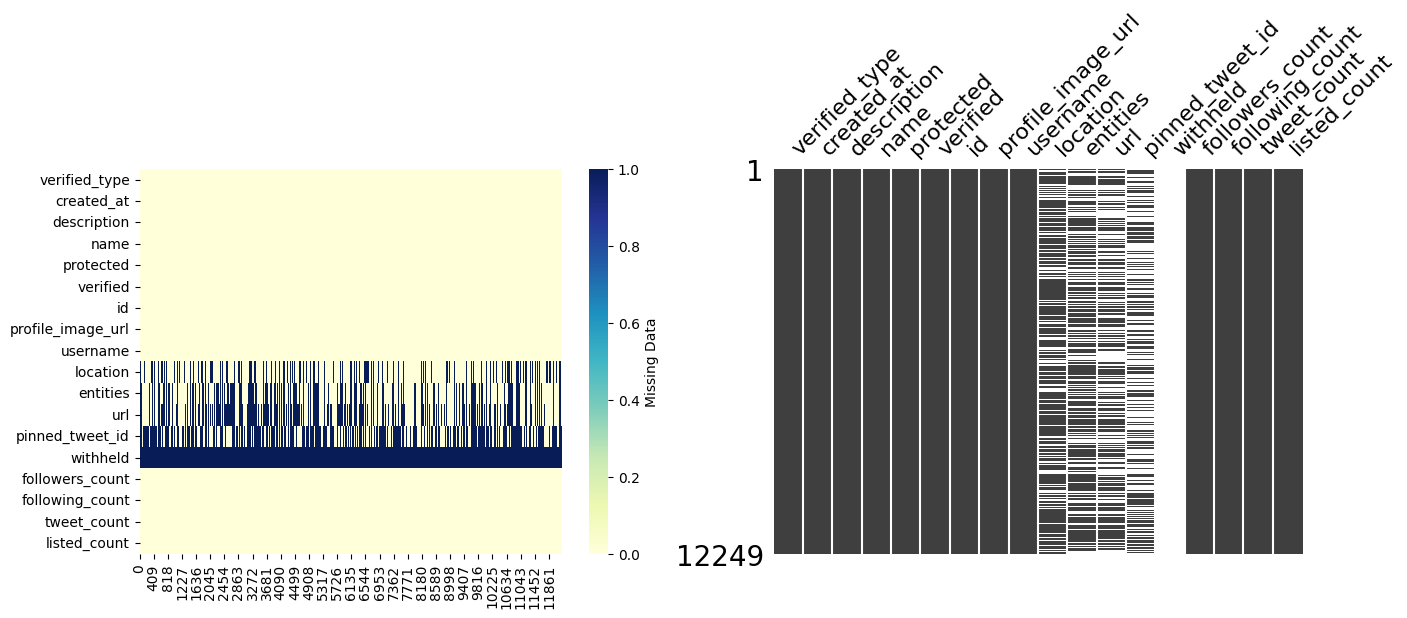

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(dfjson.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'},
           ax=axs[0])

msno.matrix(dfjson,
            ax=axs[1])


plt.show()


In [28]:
#check verified users (verified_type variable)
dfjson['verified_type'].unique()

array(['none', 'business', 'blue', 'government'], dtype=object)

In [39]:
verified_none = (dfjson[dfjson['verified_type'] == 'none']['verified_type'].count())
verified_business = (dfjson[dfjson['verified_type'] == 'business']['verified_type'].count())
verified_blue = (dfjson[dfjson['verified_type'] == 'blue']['verified_type'].count())
verified_government = (dfjson[dfjson['verified_type'] == 'government']['verified_type'].count())

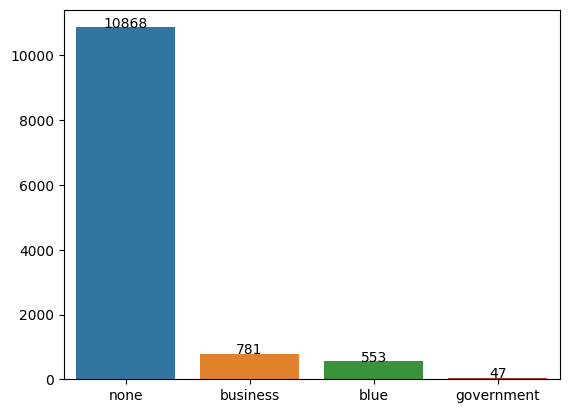

In [53]:
user_verification = sns.barplot(x=['none', 'business', 'blue', 'government'], y=[verified_none, verified_business, verified_blue, verified_government])
for i, v in enumerate([verified_none, verified_business, verified_blue, verified_government]):
    user_verification.text(i, v+1, str(v), ha='center', fontsize=10)

In [65]:
government = dfjson[dfjson['verified_type'] == 'government']
government['username']

1784       SethMagaziner
1788      SenatorShaheen
1789       SenatorDurbin
1790      SenatorBaldwin
1791       SenWhitehouse
1793           SenWarren
1794      SenCortezMasto
1795       SenBlumenthal
1984     ReverendWarnock
2073       RepSaraJacobs
2074      RepRussFulcher
2076      RepMikeQuigley
2077              RepMGS
2078       RepJimmyGomez
2079        RepGwenMoore
2081      RepDeborahRoss
2082           RepDLesko
2083           RepCasten
2084     RepBethVanDuyne
2085              RepAOC
2305        repdinatitus
2743            timkaine
3220        gillibrandny
3279      francediplo_EN
4399        FrankPallone
4470       CaptMarkKelly
4876        BillPascrell
4896      HouseJudiciary
5187      JacksonLeeTX18
7545       RepBillFoster
7548         RepDonBeyer
7549          RepEscobar
8412       JohnFetterman
8551       SpeakerPelosi
8638                 WHO
8985     CongressmanRaja
8991       janschakowsky
9585       JudiciaryDems
9587       Rep_Stansbury
9588     RepSylviaGarcia


In [68]:
business = dfjson[dfjson['verified_type'] == 'business']
business['name']

7            Valley News Live
18                    VICE UK
33                  WBAY-TV 2
35                     waaytv
62             WBRC FOX6 News
                 ...         
12176                The Hill
12185                19thnews
12191                 Reuters
12199    The Washington Times
12216     Washington Examiner
Name: name, Length: 781, dtype: object

### Bot classification

In [69]:
class twitter_bot(object):
    def __init__(self):
        pass

    def perform_train_test_split(df):
        msk = np.random.rand(len(df)) < 0.75
        train, test = df[msk], df[~msk]
        X_train, y_train = train, train.ix[:,-1]
        X_test, y_test = test, test.ix[:, -1]
        return (X_train, y_train, X_test, y_test)

    def get_heatmap(df):
        # This function gives heatmap of all NaN values
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
        plt.tight_layout()
        return plt.show()

    def bot_prediction_algorithm(df):
        # creating copy of dataframe
        train_df = df.copy()
        # performing feature engineering on id and verfied columns
        # converting id to int
        train_df['id'] = train_df.id.apply(lambda x: int(x))
        #train_df['friends_count'] = train_df.friends_count.apply(lambda x: int(x))
        train_df['followers_count'] = train_df.followers_count.apply(lambda x: 0 if x=='None' else int(x))
        #We created two bag of words because more bow is stringent on test data, so on all small dataset we check less
        if train_df.shape[0]>600:
            #bag_of_words_for_bot
            bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                           r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                           r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                           r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
        else:
            # bag_of_words_for_bot
            bag_of_words_bot = r'bot|b0t|cannabis|mishear|updates every'

        # converting verified into vectors
        train_df['verified'] = train_df.verified.apply(lambda x: 1 if ((x == True) or x == 'TRUE') else 0)

        # check if the name contains bot or screenname contains b0t
        condition = ((train_df.name.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.description.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.screen_name.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.status.str.contains(bag_of_words_bot, case=False, na=False))
                     )  # these all are bots
        predicted_df = train_df[condition]  # these all are bots
        predicted_df.bot = 1
        predicted_df = predicted_df[['id', 'bot']]

        # check if the user is verified
        verified_df = train_df[~condition]
        condition = (verified_df.verified == 1)  # these all are nonbots
        predicted_df1 = verified_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])
        '''
        # followers following count
        followers_following_df = verified_df[~condition]
        condition = ((followers_following_df.followers_count <= 50) &
                     (followers_following_df.statuses_count > 1000))  # these all are bots
        predicted_df1 = followers_following_df[condition][['id', 'bot']]
        predicted_df1.bot = 1
        predicted_df = pd.concat([predicted_df, predicted_df1])
        #followers retweet count
        followers_retweet_df = followers_following_df[~condition]
        condition = ((followers_retweet_df.followers_count < 150) &
                     (followers_retweet_df.statuses_count > 10000))  # these all are bots
        predicted_df1 = followers_retweet_df[condition][['id', 'bot']]
        predicted_df1.bot = 1
        predicted_df = pd.concat([predicted_df, predicted_df1])
        '''
        # check if description contains buzzfeed
        buzzfeed_df = verified_df[~condition]
        condition = (buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False))  # these all are nonbots
        predicted_df1 = buzzfeed_df[buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False)][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        # check if listed_count>16000
        listed_count_df = buzzfeed_df[~condition]
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: 0 if x == 'None' else x)
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: int(x))
        condition = (listed_count_df.listed_count > 16000)  # these all are nonbots
        predicted_df1 = listed_count_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        #remaining
        predicted_df1 = listed_count_df[~condition][['id', 'bot']]
        predicted_df1.bot = 0 # these all are nonbots
        predicted_df = pd.concat([predicted_df, predicted_df1])
        return predicted_df

    def get_predicted_and_true_values(features, target):
        y_pred, y_true = twitter_bot.bot_prediction_algorithm(features).bot.tolist(), target.tolist()
        return (y_pred, y_true)

    def get_accuracy_score(df):
        (X_train, y_train, X_test, y_test) = twitter_bot.perform_train_test_split(df)
        # predictions on training data
        y_pred_train, y_true_train = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        train_acc = metrics.accuracy_score(y_pred_train, y_true_train)
        #predictions on test data
        y_pred_test, y_true_test = twitter_bot.get_predicted_and_true_values(X_test, y_test)
        test_acc = metrics.accuracy_score(y_pred_test, y_true_test)
        return (train_acc, test_acc)

    def plot_roc_curve(df):
        sns.set(font_scale=1.5)
        sns.set_style("whitegrid", {'axes.grid': False})
        (X_train, y_train, X_test, y_test) = twitter_bot.perform_train_test_split(df)
        # Train ROC
        y_pred_train, y_true = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        scores = np.linspace(start=0.01, stop=0.9, num=len(y_true))
        fpr_train, tpr_train, threshold = metrics.roc_curve(y_pred_train, scores, pos_label=0)
        plt.plot(fpr_train, tpr_train, label='Train AUC: %5f' % metrics.auc(fpr_train, tpr_train), color='darkblue')
        #Test ROC
        y_pred_test, y_true = twitter_bot.get_predicted_and_true_values(X_test, y_test)
        scores = np.linspace(start=0.01, stop=0.9, num=len(y_true))
        fpr_test, tpr_test, threshold = metrics.roc_curve(y_pred_test, scores, pos_label=0)
        plt.plot(fpr_test,tpr_test, label='Test AUC: %5f' %metrics.auc(fpr_test,tpr_test), ls='--', color='red')
        #Misc
        plt.plot(threshold, ls='--', color='lightblue', label="Threshold line")
        plt.xlim([-0.1,1])
        plt.plot([0,1],[0,1], color='lightgray', label="45 degree line")
        plt.title("Reciever Operating Characteristic (ROC)")
        plt.xlabel("False Positive Rate (FPR)")
        plt.ylabel("True Positive Rate (TPR)")
        plt.legend(loc='lower right')
        plt.show()


In [86]:
filepath = 'https://raw.githubusercontent.com/jubins/ML-TwitterBotDetection/master/FinalProjectAndCode/kaggle_data/'
file= filepath+'training_data_2_csv_UTF.csv'

training_data = pd.read_csv(file)
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]

In [98]:
bot_prediction_algorithm(training_data)

/tmp/ipykernel_261268/1893798882.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_df.bot = 1
/tmp/ipykernel_261268/1893798882.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: 0 if x == 'None' else x)
/tmp/ipykernel_261268/1893798882.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,id,bot
0,816000000000000000,1
1,4843621225,1
2,4303727112,1
3,3063139353,1
4,2955142070,1
...,...,...
2786,102124883,0
2788,104226662,0
2789,15028834,0
2792,236209129,0


#### The source of the algorithm
https://github.com/jubins/MachineLearning-Detecting-Twitter-Bots
Some parameters have been updated since our data was scraped with API v2

In [111]:
 def bot_prediction_algorithm_modified(dfjson):
        # creating copy of dataframe
        train_df = dfjson.copy()
        # performing feature engineering on id and verfied columns
        # converting id to int
        train_df['id'] = train_df.id.apply(lambda x: int(x))
        #train_df['friends_count'] = train_df.friends_count.apply(lambda x: int(x))
        train_df['followers_count'] = train_df.followers_count.apply(lambda x: 0 if x=='None' else int(x))
        #train_df['friends_count'] = train_df.friends_count.apply(lambda x: 0 if x=='None' else int(x))
        #We created two bag of words because more bow is stringent on test data, so on all small dataset we check less
        if train_df.shape[0]>600:
            #bag_of_words_for_bot
            bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                           r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                           r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                           r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
        else:
            # bag_of_words_for_bot
            bag_of_words_bot = r'bot|b0t|cannabis|mishear|updates every'

        # converting verified into vectors
        train_df['verified'] = train_df.verified.apply(lambda x: 1 if ((x == True) or x == 'TRUE') else 0)
        train_df['bot'] = 0
        
        # check if the name contains bot or screenname contains b0t
        condition = ((train_df.name.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.description.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.username.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.pinned_tweet_id.str.contains(bag_of_words_bot, case=False, na=False))
                     )  # these all are bots
        
        predicted_df = train_df[condition].assign(bot=1)[['id', 'bot']]

        # check if the user is verified
        verified_df = train_df[~condition]
        condition = (verified_df.verified == 1)  # these all are nonbots
        predicted_df1 = verified_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])
        
        '''
        # followers following count
        followers_following_df = verified_df[~condition]
        condition = ((followers_following_df.followers_count <= 50) &
                     (followers_following_df.statuses_count > 1000))  # these all are bots
        predicted_df1 = followers_following_df[condition][['id', 'bot']]
        predicted_df1.bot = 1
        predicted_df = pd.concat([predicted_df, predicted_df1])
        
        #followers retweet count
        followers_retweet_df = followers_following_df[~condition]
        condition = ((followers_retweet_df.followers_count < 150) &
                     (followers_retweet_df.statuses_count > 10000))  # these all are bots
        predicted_df1 = followers_retweet_df[condition][['id', 'bot']]
        predicted_df1.bot = 1
        predicted_df = pd.concat([predicted_df, predicted_df1])
        '''
        
        # check if description contains buzzfeed
        buzzfeed_df = verified_df[~condition]
        condition = (buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False))  # these all are nonbots
        predicted_df1 = buzzfeed_df[buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False)][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        # check if listed_count>16000
        listed_count_df = buzzfeed_df[~condition]
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: 0 if x == 'None' else x)
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: int(x))
        condition = (listed_count_df.listed_count > 16000)  # these all are nonbots
        predicted_df1 = listed_count_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        #remaining
        predicted_df1 = listed_count_df[~condition][['id', 'bot']]
        predicted_df1.bot = 0 # these all are nonbots
        predicted_df = pd.concat([predicted_df, predicted_df1])
        return predicted_df

In [113]:
predicted_bots = bot_prediction_algorithm_modified(dfjson)

In [121]:
bots_df = predicted_bots[predicted_bots['bot'] == 1]
print(bots_df)

                       id  bot
3               490214473    1
12     970949740786577409    1
14               58966831    1
24              138168339    1
30              167600325    1
...                   ...  ...
12227           960567589    1
12232            73800371    1
12239            17006036    1
12244           547824954    1
12246            12896172    1

[2426 rows x 2 columns]


In [122]:
nonbots_df = predicted_bots[predicted_bots['bot'] == 0]
print(nonbots_df)

                        id  bot
7                 21653602    0
18                15995155    0
21                18978469    0
33                25371684    0
35                 9899992    0
...                    ...  ...
12242            449600949    0
12243  1547098263341666304    0
12245             74552263    0
12247             50434933    0
12248            289118612    0

[9823 rows x 2 columns]


In [123]:
prueba = pd.concat([dfjson, predicted_bots], axis=1)

In [125]:
prueba.to_csv('pruebabots.csv', index=False)

## Try to decipher gender through bio's description

Documents that I will be using in order to achieve this task:
- https://ling.yale.edu/sites/default/files/files/Margaret%20Ott.pdf

In [132]:
!pip install Analyze

  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.19.9
    Uninstalling tqdm-4.19.9:
      Successfully uninstalled tqdm-4.19.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.2.2 requires tqdm==4.19.9, but you have tqdm 4.64.1 which is incompatible.


In [129]:
import unittest

from analyze import declared_gender


class TestDeclaredGender(unittest.TestCase):
    def test_declared_gender(self):
        for description, expected_gender in [
            ("pronoun: she", "female"),
            ("she,her", "female"),
            ("she/her", "female"),
            ("she/her/hers", "female"),
            ("she,her,hers", "female"),
            ("pronouns: she/her", "female"),
            ("i am a nonbinary person", "nonbinary"),
            ("hi i'm non-binary", "nonbinary"),
            ("non binary human", "nonbinary"),
            ("i'm nb", "nonbinary"),
            ("just a guy living life", "male"),
            ("a southern gal", "female"),
            ("Proud womanist", "female"),
            ("latina", "female"),
            ("latino", "male"),
            ("he", "male"),
            ("he/him", "male"),
            ("he,him", "male"),
            ("he/his", "male"),
            ("he,his", "male"),
            ("he is a man", "male"),
            ("i go by they", "nonbinary"),
            ("them/they", "nonbinary"),
            ("them,they", "nonbinary"),
            ("xe", "nonbinary"),
            ("ze", "nonbinary"),
            ("zie", "nonbinary"),
            ("hir", "nonbinary"),
            ("pronoun.is/she", "female"),
            ("pronoun.is/he", "male"),
            ("pronoun.is/they", "nonbinary"),
            ("pronoun.is/foo", "nonbinary"),
            ("pronoun.is/zie", "nonbinary"),
            ("pronoun.is/hir", "nonbinary"),
            ("mum to one boy and one girl", "andy"),
            ("proud mom", "female"),
            ("cardamom", "andy"),
            ("doting dad", "male"),
            ("crawdad", "andy"),
            ("grandfather", "male"),
            ("the empire state building", "andy"),
        ]:
            guess = declared_gender(description)
            assert guess == expected_gender, (
                "Should have guessed profile '%s' was '%s', not '%s'"
                % (description, expected_gender, guess)
            )
            

ModuleNotFoundError: No module named 'analyze'

In [136]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("Johnade/distilbert-base-multilingual-cased-twitter-identity-classification")

model = AutoModelForSequenceClassification.from_pretrained("Johnade/distilbert-base-multilingual-cased-twitter-identity-classification")

/home/maria/git/Proyecto_misscarriage_git/MiscarriageTwitterAnalysis/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [140]:
tokenizer

DistilBertTokenizerFast(name_or_path='Johnade/distilbert-base-multilingual-cased-twitter-identity-classification', vocab_size=119547, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [139]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
      